In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

df = pd.read_csv('data.csv')

# remove other status
# df = df[df['status'].str.contains('healthy') | df['status'].str.contains('COVID-19') ].copy(deep=True)

# extract features
X = np.array(df[df.columns[-42:]])


scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

# extract labels
y = np.array(df['status'])
y[y=='healthy'] = int(0) # not covid
y[(y=='symptomatic') | (y=='COVID-19')] = int(1) # covid
y = y.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3)

In [25]:
# Fix imbalanced dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

df = pd.read_csv('data.csv')

# remove other status
# df = df[df['status'].str.contains('healthy') | df['status'].str.contains('COVID-19') ].copy(deep=True)

from sklearn.utils import resample
df_majority = df[df['status'].str.contains('healthy')]
df_minority = df[df['status'].str.contains('symptomatic') | df['status'].str.contains('COVID-19')]

df_majority_downsampled = resample(df_majority, 
                                   replace=False,    
                                   n_samples= 2000)


X = np.concatenate((np.array(df_minority[df_minority.columns[-42:]]), np.array(df_majority_downsampled[df_majority_downsampled.columns[-42:]])))

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# extract labels
#y = np.array(df['status'])
y = np.concatenate((np.array(df_minority['status']), np.array(df_majority_downsampled['status'])))

y[y=='healthy'] = int(0) # not covid
y[(y=='symptomatic') | (y=='COVID-19')] = int(1) # covid
y = y.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3)

In [12]:
[np.sum(y==int(1))/y.shape[0], np.sum(y==int(0))/y.shape[0]]

[0.4275901545506583, 0.5724098454493417]

In [18]:
# define REAL feature names e.g., EEPD_1, EEPD_2, MFMC_1,
feature_names = df.columns[-42:]
feature_names
# feature_names = ['EEPD_1', 'EEPD_2', ...]

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
       'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
       'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
       'feature32', 'feature33', 'feature34', 'feature35', 'feature36',
       'feature37', 'feature38', 'feature39', 'feature40', 'feature41',
       'feature42'],
      dtype='object')

### Train a Random Forest Model

In [19]:
rfc = RandomForestClassifier(random_state=0)
#rfc = RandomForestClassifier(n_estimators= 25, random_state=0)

rfc = rfc.fit(X_train,Y_train)

score_train = rfc.score(X_train,Y_train)
score_test = rfc.score(X_test,Y_test)
# f1 score, precision, recall

print("Random Forest accuracy: train {:.3f}, test {:.3f}".format(score_train, score_test))

Random Forest accuracy: train 1.000, test 0.563


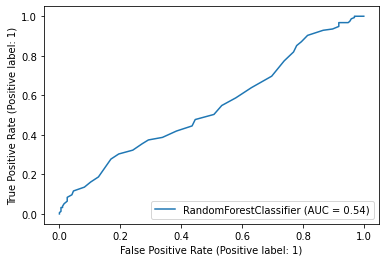

In [15]:
from sklearn.metrics import RocCurveDisplay
y_pred = rfc.predict_proba(X_test)
# plot roc curve
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, Y_test)
plt.show()

/opt/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


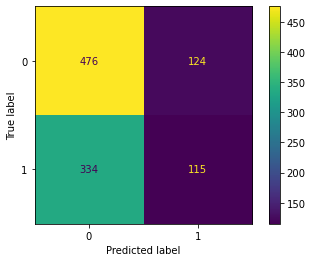

In [20]:
plot_confusion_matrix(rfc, X_test, Y_test) 

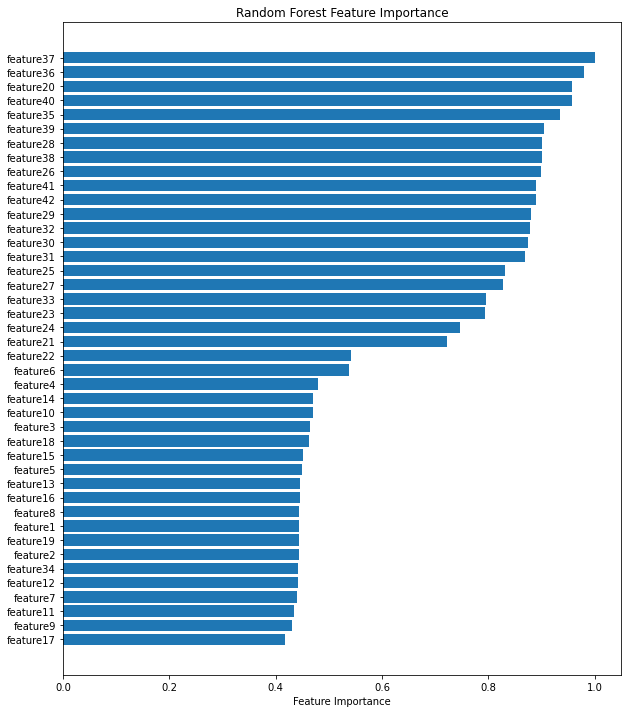

In [7]:
# plot feature importance
sorted_idx = rfc.feature_importances_.argsort()
plt.figure(figsize = (10,12))
plt.barh(feature_names[sorted_idx], rfc.feature_importances_[sorted_idx]/max(rfc.feature_importances_))
plt.xlabel("Feature Importance")
plt.title('Random Forest Feature Importance')
plt.show()

In [10]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X_train, Y_train, cv=5)
scores

array([0.75085714, 0.75428571, 0.74828375, 0.75057208, 0.74942792])

### Train Logistic Regression

In [46]:
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv')

# extract features
X = np.array(df[df.columns[-42:]])

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)


# extract labels
y = np.array(df['status'])
y[y=='healthy'] = int(0) # not covid
y[(y=='symptomatic') | (y=='COVID-19')] = int(1) # covid
y = y.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3)
"""

"\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import train_test_split\n\ndf = pd.read_csv('data.csv')\n\n# extract features\nX = np.array(df[df.columns[-42:]])\n\nscaler = StandardScaler()\nscaler.fit(X)\n\nX_scaled = scaler.transform(X)\n\n\n# extract labels\ny = np.array(df['status'])\ny[y=='healthy'] = int(0) # not covid\ny[(y=='symptomatic') | (y=='COVID-19')] = int(1) # covid\ny = y.astype('int')\n\nX_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3)\n"

In [26]:
df = LogisticRegression(solver = 'lbfgs')

df.fit(X_train,Y_train) 
y_pred = df.predict(X_test) 

df.predict(X_train[0:10])
predictions = df.predict(X_train)

score = df.score(X_train, Y_train)
print(score)

score = df.score(X_test, Y_test)
print(score)


0.5803680981595092
0.5586272640610105


### Train SVM (try different kernels)

In [47]:
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv')

# extract features
X = np.array(df[df.columns[-42:]])

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)


# extract labels
y = np.array(df['status'])
y[y=='healthy'] = int(0) # not covid
y[(y=='symptomatic') | (y=='COVID-19')] = int(1) # covid
y = y.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3)
"""

"\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.model_selection import train_test_split\n\ndf = pd.read_csv('data.csv')\n\n# extract features\nX = np.array(df[df.columns[-42:]])\n\nscaler = StandardScaler()\nscaler.fit(X)\n\nX_scaled = scaler.transform(X)\n\n\n# extract labels\ny = np.array(df['status'])\ny[y=='healthy'] = int(0) # not covid\ny[(y=='symptomatic') | (y=='COVID-19')] = int(1) # covid\ny = y.astype('int')\n\nX_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3)\n"

In [22]:
#clf = svm.SVC(kernel='linear')
clf = svm.SVC(kernel='rbf')

clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)


In [23]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(Y_train, y_pred_train))

Accuracy: 0.5786463298379408
Accuracy: 0.6269938650306749


### Train Naive Bayes

In [48]:
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv')

# extract features
X = np.array(df[df.columns[-42:]])

# extract labels
y = np.array(df['status'])
y[y=='healthy'] = int(0) # not covid
y[(y=='symptomatic') | (y=='COVID-19')] = int(1) # covid
y = y.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)
"""

"\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.model_selection import train_test_split\n\ndf = pd.read_csv('data.csv')\n\n# extract features\nX = np.array(df[df.columns[-42:]])\n\n# extract labels\ny = np.array(df['status'])\ny[y=='healthy'] = int(0) # not covid\ny[(y=='symptomatic') | (y=='COVID-19')] = int(1) # covid\ny = y.astype('int')\n\nX_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)\n"

In [21]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
print("Naive Bayes score: ",nb.score(X_train, Y_train))
print("Naive Bayes score: ",nb.score(X_test, Y_test))

Naive Bayes score:  0.5366053169734152
Naive Bayes score:  0.5424213536701621
